Technical Definitions:																													
Human Development Index (HDI): A composite index measuring average achievement in three basic dimensions of human development?a long and healthy life, knowledge and a decent standard of living. See Technical note 1 at http://hdr.undp.org/sites/default/files/hdr2022_technical_notes.pdf for details on how the HDI is calculated.	
Inequality-adjusted HDI (IHDI): HDI value adjusted for inequalities in the three basic dimensions of human development. See Technical note 2 at http://hdr.undp.org/sites/default/files/hdr2022_technical_notes.pdf for details on how the IHDI is calculated.														
Overall loss: Percentage difference between the IHDI value and the HDI value.							
Difference from HDI rank: Difference in ranks on the IHDI and the HDI, calculated only for countries for which an IHDI value is calculated.							
Coefficient of human inequality: Average inequality in the three basic dimensions of human development.							
Inequality in life expectancy: Inequality in distribution of expected length of life based on data from life tables estimated using the Atkinson inequality index.							
Inequality-adjusted life expectancy index: HDI life expectancy index value adjusted for inequality in distribution of expected length of life based on data from life tables listed in Main data sources.							
Inequality in education: Inequality in distribution of years of schooling based on data from household surveys estimated using the Atkinson inequality index.							
Inequality-adjusted education index: HDI education index value adjusted for inequality in distribution of years of schooling based on data from household surveys listed in Main data sources.							
Inequality in income: Inequality in income distribution based on data from household surveys estimated using the Atkinson inequality index.							
Inequality-adjusted income index: HDI income index value adjusted for inequality in income distribution based on data from household surveys listed in Main data sources.							
Income shares: Percentage share of income (or consumption) that accrues to the indicated population subgroups.	
Income share held by richest 1%: Share of pretax national income held by the richest 1 percent of the population. Pretax national income is the sum of all pretax personal income flows accruing to the owners of the production factors, labour and capital before the tax/transfer system is taken into account and after the pension system is taken into account.	
Gini coefficient: Measure of the deviation of the distribution of income among individuals or households in a country from a perfectly equal distribution. A value of 0 represents absolute equality, a value of 100 absolute inequality.	
Main data sources	
Column 1: HDRO calculations based on data from Barro and Lee (2018), IMF (2022), UNDESA (2022a), UNESCO Institute for Statistics (2022), United Nations Statistics Division (2022) and World Bank (2022).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1st. load the file.  This actually took a minute to figure out, as it was an xls, not a csv. 
Note the difference from a standard pd.read_csv

In [2]:
file_path='../data/Inequality Adjusted Human Development Indicator (1).xls'
test_inequality = pd.read_excel(file_path)

Next, inspect the file.  

In [3]:
test_inequality.head(15)

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Unnamed: 3,Inequality-adjusted HDI (IHDI),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Inequality-adjusted income index,Unnamed: 23,Income shares held by (%),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Gini coefficient,Unnamed: 31
0,NaN,NaN,Value,NaN,Value,NaN,Overall loss (%),NaN,Difference from HDI rank,b,...,Value,NaN,Poorest 40 percent,NaN,Richest 10 %,NaN,Richest 1 %,NaN,(%),NaN
1,HDI rank,Country,2021,NaN,2021,NaN,2021,NaN,2021,NaN,...,2021,NaN,2010-2021,e,2010-2021,e,2021,NaN,2010-2021,e
2,NaN,Very high human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Switzerland,0.962,NaN,0.894,NaN,7.068607,NaN,-3,NaN,...,0.829672,NaN,19.9,NaN,25.8,NaN,11.46,NaN,33.1,NaN
4,2,Norway,0.961,NaN,0.908,NaN,5.515088,NaN,0,NaN,...,0.865839,NaN,22.9,NaN,22.4,NaN,8.88,NaN,27.7,NaN
5,3,Iceland,0.959,NaN,0.915,NaN,4.588113,NaN,2,NaN,...,0.864396,NaN,23.9,NaN,22.1,NaN,8.78,NaN,26.1,NaN
6,4,"Hong Kong, China (SAR)",0.952,NaN,0.828,NaN,13.02521,NaN,-19,NaN,...,0.724064,NaN,..,NaN,..,NaN,17.85,NaN,..,NaN
7,5,Australia,0.951,NaN,0.876,NaN,7.886435,NaN,-6,NaN,...,0.77606,NaN,19.5,NaN,26.6,NaN,11.28,NaN,34.3,NaN
8,6,Denmark,0.948,NaN,0.898,NaN,5.274262,NaN,3,NaN,...,0.869997,NaN,23.5,NaN,23.5,NaN,12.91,NaN,27.7,NaN
9,7,Sweden,0.947,NaN,0.885,NaN,6.54699,NaN,0,NaN,...,0.830188,NaN,21.9,NaN,22.7,NaN,10.54,NaN,29.3,NaN


Next, need to drop rows and columns. Rename rows and columns

In [4]:
inequality_clean = test_inequality.drop(['Unnamed: 0', 
                                         'Unnamed: 3', 
                                         'Unnamed: 5', 
                                         'Unnamed: 23', 
                                         'Unnamed: 31'], axis=1)

In [5]:
inequality_clean=inequality_clean.rename(columns={'Unnamed: 1': 'Country'})
inequality_clean

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Coefficient of human inequality,Unnamed: 11,Inequality in life expectancy,...,Inequality in income,a.1,Inequality-adjusted income index,Income shares held by (%),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Gini coefficient
0,NaN,Value,Value,Overall loss (%),NaN,Difference from HDI rank,b,NaN,NaN,(%),...,(%),NaN,Value,Poorest 40 percent,NaN,Richest 10 %,NaN,Richest 1 %,NaN,(%)
1,Country,2021,2021,2021,NaN,2021,NaN,2021,NaN,2021,...,2021,d,2021,2010-2021,e,2010-2021,e,2021,NaN,2010-2021
2,Very high human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,0.962,0.894,7.068607,NaN,-3,NaN,6.899906,NaN,3.103429,...,15.58172,NaN,0.829672,19.9,NaN,25.8,NaN,11.46,NaN,33.1
4,Norway,0.961,0.908,5.515088,NaN,0,NaN,5.435152,NaN,2.541615,...,11.43144,NaN,0.865839,22.9,NaN,22.4,NaN,8.88,NaN,27.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Columns 8 and 10: Calculated based on data fro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,Column 9: Calculated based on inequality in ed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Column 11: Calculated based on inequality in i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Columns 12, 13 and 15: World Bank (2022).",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
inequality_clean =inequality_clean.drop(inequality_clean.index[:3])
inequality_clean

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Coefficient of human inequality,Unnamed: 11,Inequality in life expectancy,...,Inequality in income,a.1,Inequality-adjusted income index,Income shares held by (%),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,NaN,-3,NaN,6.899906,NaN,3.103429,...,15.58172,NaN,0.829672,19.9,NaN,25.8,NaN,11.46,NaN,33.1
4,Norway,0.961,0.908,5.515088,NaN,0,NaN,5.435152,NaN,2.541615,...,11.43144,NaN,0.865839,22.9,NaN,22.4,NaN,8.88,NaN,27.7
5,Iceland,0.959,0.915,4.588113,NaN,2,NaN,4.556437,NaN,1.954472,...,9.51407,NaN,0.864396,23.9,NaN,22.1,NaN,8.78,NaN,26.1
6,"Hong Kong, China (SAR)",0.952,0.828,13.02521,NaN,-19,NaN,12.429978,NaN,2.055595,...,25.56272,NaN,0.724064,..,NaN,..,NaN,17.85,NaN,..
7,Australia,0.951,0.876,7.886435,NaN,-6,NaN,7.640183,NaN,2.73798,...,17.126,NaN,0.77606,19.5,NaN,26.6,NaN,11.28,NaN,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Columns 8 and 10: Calculated based on data fro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,Column 9: Calculated based on inequality in ed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Column 11: Calculated based on inequality in i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Columns 12, 13 and 15: World Bank (2022).",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
inequality_clean=inequality_clean.iloc[0:196]
inequality_clean.tail(30)

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Coefficient of human inequality,Unnamed: 11,Inequality in life expectancy,...,Inequality in income,a.1,Inequality-adjusted income index,Income shares held by (%),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Gini coefficient
169,Nigeria,0.535,0.341,36.261682,NaN,-7,NaN,36.024417,NaN,39.606491,...,28.05169,NaN,0.42051,18.7,NaN,26.7,NaN,11.59,NaN,35.1
170,Rwanda,0.534,0.402,24.719101,NaN,11,NaN,24.647642,NaN,19.391375,...,27.19248,NaN,0.340441,15.8,NaN,35.6,NaN,19.89,NaN,43.7
171,Benin,0.525,0.334,36.380952,NaN,-7,NaN,36.109879,NaN,32.661728,...,31.97436,NaN,0.362628,18.1,NaN,29.9,NaN,17.51,NaN,37.8
172,Uganda,0.525,0.396,24.571429,NaN,9,NaN,24.419622,NaN,20.404097,...,24.940388,NaN,0.349507,16.1,NaN,34.5,NaN,17.05,NaN,42.7
173,Lesotho,0.514,0.372,27.626459,NaN,5,NaN,27.394298,NaN,33.049133,...,29.57664,NaN,0.350623,13.5,NaN,32.9,NaN,14.46,NaN,44.9
174,Malawi,0.512,0.377,26.367188,NaN,7,NaN,26.320421,NaN,19.677002,...,31.27695,NaN,0.278717,17.9,NaN,31,NaN,28.04,NaN,38.5
175,Senegal,0.511,0.354,30.72407,NaN,2,NaN,29.549157,NaN,18.12817,...,23.384,NaN,0.406205,18,NaN,30.5,NaN,13.18,NaN,38.1
176,Djibouti,0.509,..,..,NaN,..,NaN,..,NaN,25.704308,...,27.744952,NaN,0.427524,15.8,NaN,32.3,NaN,15.86,NaN,41.6
177,Sudan,0.508,0.336,33.858268,NaN,-1,NaN,33.479317,NaN,24.987741,...,33,NaN,0.361979,19.9,NaN,27.8,NaN,15.36,NaN,34.2
178,Madagascar,0.501,0.367,26.746507,NaN,7,NaN,26.852639,NaN,23.655098,...,27.557,NaN,0.295131,15.7,NaN,33.5,NaN,15.17,NaN,42.6


In [8]:
inequality_clean.head(10)

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Coefficient of human inequality,Unnamed: 11,Inequality in life expectancy,...,Inequality in income,a.1,Inequality-adjusted income index,Income shares held by (%),Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,NaN,-3,NaN,6.899906,NaN,3.103429,...,15.58172,NaN,0.829672,19.9,NaN,25.8,NaN,11.46,NaN,33.1
4,Norway,0.961,0.908,5.515088,NaN,0,NaN,5.435152,NaN,2.541615,...,11.43144,NaN,0.865839,22.9,NaN,22.4,NaN,8.88,NaN,27.7
5,Iceland,0.959,0.915,4.588113,NaN,2,NaN,4.556437,NaN,1.954472,...,9.51407,NaN,0.864396,23.9,NaN,22.1,NaN,8.78,NaN,26.1
6,"Hong Kong, China (SAR)",0.952,0.828,13.02521,NaN,-19,NaN,12.429978,NaN,2.055595,...,25.56272,NaN,0.724064,..,NaN,..,NaN,17.85,NaN,..
7,Australia,0.951,0.876,7.886435,NaN,-6,NaN,7.640183,NaN,2.73798,...,17.126,NaN,0.77606,19.5,NaN,26.6,NaN,11.28,NaN,34.3
8,Denmark,0.948,0.898,5.274262,NaN,3,NaN,5.186914,NaN,3.006301,...,10.05068,NaN,0.869997,23.5,NaN,23.5,NaN,12.91,NaN,27.7
9,Sweden,0.947,0.885,6.54699,NaN,0,NaN,6.416555,NaN,2.610125,...,12.77164,NaN,0.830188,21.9,NaN,22.7,NaN,10.54,NaN,29.3
10,Ireland,0.945,0.886,6.243386,NaN,2,NaN,6.161783,NaN,2.82573,...,12.26296,NaN,0.87737,21.8,NaN,25.1,NaN,11.8,NaN,30.6
11,Germany,0.942,0.883,6.26327,NaN,1,NaN,6.17713,NaN,3.408159,...,12.46003,NaN,0.833262,20.8,NaN,25.1,NaN,12.77,NaN,31.7
12,Netherlands,0.941,0.878,6.695005,NaN,1,NaN,6.697945,NaN,3.334346,...,11.89275,NaN,0.842143,22.3,NaN,23.9,NaN,6.92,NaN,29.2


In [9]:
inequality_clean = inequality_clean.drop(['Unnamed: 7', 
                                          'Unnamed: 9', 
                                          'Unnamed: 11', 
                                          'Unnamed: 19', '
                                          "Unnamed: 25', 
                                          'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 29'], axis=1)
inequality_clean.head(15)

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Unnamed: 13,Inequality-adjusted life expectancy index,Unnamed: 15,Inequality in education,a,Inequality-adjusted education index,Inequality in income,a.1,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,-3,6.899906,3.103429,NaN,0.953868,NaN,2.01457,NaN,0.90179,15.58172,NaN,0.829672,19.9,11.46,33.1
4,Norway,0.961,0.908,5.515088,0,5.435152,2.541615,NaN,0.948104,NaN,2.3324,NaN,0.911682,11.43144,NaN,0.865839,22.9,8.88,27.7
5,Iceland,0.959,0.915,4.588113,2,4.556437,1.954472,NaN,0.945433,NaN,2.20077,NaN,0.937802,9.51407,NaN,0.864396,23.9,8.78,26.1
6,"Hong Kong, China (SAR)",0.952,0.828,13.02521,-19,12.429978,2.055595,NaN,0.979444,NaN,9.671619,NaN,0.801655,25.56272,NaN,0.724064,..,17.85,..
7,Australia,0.951,0.876,7.886435,-6,7.640183,2.73798,NaN,0.965535,NaN,3.05657,NaN,0.895978,17.126,NaN,0.77606,19.5,11.28,34.3
8,Denmark,0.948,0.898,5.274262,3,5.186914,3.006301,NaN,0.915849,NaN,2.50376,NaN,0.908681,10.05068,NaN,0.869997,23.5,12.91,27.7
9,Sweden,0.947,0.885,6.54699,0,6.416555,2.610125,NaN,0.943682,NaN,3.8679,NaN,0.884727,12.77164,NaN,0.830188,21.9,10.54,29.3
10,Ireland,0.945,0.886,6.243386,2,6.161783,2.82573,NaN,0.926857,NaN,3.39666,NaN,0.855977,12.26296,NaN,0.87737,21.8,11.8,30.6
11,Germany,0.942,0.883,6.26327,1,6.17713,3.408159,NaN,0.90098,NaN,2.6632,NaN,0.91711,12.46003,NaN,0.833262,20.8,12.77,31.7
12,Netherlands,0.941,0.878,6.695005,1,6.697945,3.334346,NaN,0.917391,NaN,4.86674,NaN,0.874643,11.89275,NaN,0.842143,22.3,6.92,29.2


In [10]:
inequality_clean = inequality_clean.drop(['Unnamed: 13', 'Unnamed: 15', 'a', 'a.1'], axis=1)
inequality_clean.head(15)

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,-3,6.899906,3.103429,0.953868,2.01457,0.90179,15.58172,0.829672,19.9,11.46,33.1
4,Norway,0.961,0.908,5.515088,0,5.435152,2.541615,0.948104,2.3324,0.911682,11.43144,0.865839,22.9,8.88,27.7
5,Iceland,0.959,0.915,4.588113,2,4.556437,1.954472,0.945433,2.20077,0.937802,9.51407,0.864396,23.9,8.78,26.1
6,"Hong Kong, China (SAR)",0.952,0.828,13.02521,-19,12.429978,2.055595,0.979444,9.671619,0.801655,25.56272,0.724064,..,17.85,..
7,Australia,0.951,0.876,7.886435,-6,7.640183,2.73798,0.965535,3.05657,0.895978,17.126,0.77606,19.5,11.28,34.3
8,Denmark,0.948,0.898,5.274262,3,5.186914,3.006301,0.915849,2.50376,0.908681,10.05068,0.869997,23.5,12.91,27.7
9,Sweden,0.947,0.885,6.54699,0,6.416555,2.610125,0.943682,3.8679,0.884727,12.77164,0.830188,21.9,10.54,29.3
10,Ireland,0.945,0.886,6.243386,2,6.161783,2.82573,0.926857,3.39666,0.855977,12.26296,0.87737,21.8,11.8,30.6
11,Germany,0.942,0.883,6.26327,1,6.17713,3.408159,0.90098,2.6632,0.91711,12.46003,0.833262,20.8,12.77,31.7
12,Netherlands,0.941,0.878,6.695005,1,6.697945,3.334346,0.917391,4.86674,0.874643,11.89275,0.842143,22.3,6.92,29.2


Notes: The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: 
A long and healthy life, 
Being knowledgeable and, 
A decent standard of living. 
The HDI is the geometric mean of normalized indices for each of the three dimensions.

Notes: The Gini coefficient measures the inequality among the values of a frequency distribution, such as levels of income. A Gini coefficient of 0 reflects perfect equality, where all income or wealth values are the same, while a Gini coefficient of 1 (or 100%) reflects maximal inequality among values, a situation where a single individual has all the income while all others have none.

In [11]:
inequality_clean.dtypes

Country                                      object
Human Development Index (HDI)                object
Inequality-adjusted HDI (IHDI)               object
Unnamed: 6                                   object
Unnamed: 8                                   object
Coefficient of human inequality              object
Inequality in life expectancy                object
Inequality-adjusted life expectancy index    object
Inequality in education                      object
Inequality-adjusted education index          object
Inequality in income                         object
Inequality-adjusted income index             object
Income shares held by (%)                    object
Unnamed: 28                                  object
Gini coefficient                             object
dtype: object

In [12]:
inequality_clean.columns

Index(['Country', 'Human Development Index (HDI)',
       'Inequality-adjusted HDI (IHDI)', 'Unnamed: 6', 'Unnamed: 8',
       'Coefficient of human inequality', 'Inequality in life expectancy',
       'Inequality-adjusted life expectancy index', 'Inequality in education',
       'Inequality-adjusted education index', 'Inequality in income',
       'Inequality-adjusted income index', 'Income shares held by (%)',
       'Unnamed: 28', 'Gini coefficient'],
      dtype='object')

Needed to convert object columns, but they weren't converting using the standard method .astype(). So, I was able to make it work using apply(pd.to_numeric, errors='coerce')

In [13]:
inequality_clean[['Human Development Index (HDI)','Inequality-adjusted life expectancy index','Inequality-adjusted education index', 'Inequality-adjusted income index', 'Gini coefficient']] = inequality_clean[['Human Development Index (HDI)', 'Inequality-adjusted life expectancy index', 'Inequality-adjusted education index', 'Inequality-adjusted income index', 'Gini coefficient']].apply(pd.to_numeric, errors='coerce')
inequality_clean

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,-3,6.899906,3.103429,0.953868,2.01457,0.901790,15.58172,0.829672,19.9,11.46,33.1
4,Norway,0.961,0.908,5.515088,0,5.435152,2.541615,0.948104,2.3324,0.911682,11.43144,0.865839,22.9,8.88,27.7
5,Iceland,0.959,0.915,4.588113,2,4.556437,1.954472,0.945433,2.20077,0.937802,9.51407,0.864396,23.9,8.78,26.1
6,"Hong Kong, China (SAR)",0.952,0.828,13.02521,-19,12.429978,2.055595,0.979444,9.671619,0.801655,25.56272,0.724064,..,17.85,NaN
7,Australia,0.951,0.876,7.886435,-6,7.640183,2.73798,0.965535,3.05657,0.895978,17.126,0.776060,19.5,11.28,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Niger,0.400,0.292,27.0,2,26.7106,28.73307,0.455848,34.96483,0.171570,16.433899,0.317799,19,11.6,37.3
195,Chad,0.394,0.251,36.294416,1,35.99798,38.558849,0.307446,42.9329,0.176344,26.50219,0.290117,18.2,15.71,37.5
196,South Sudan,0.385,0.245,36.363636,1,36.259867,36.974091,0.339130,39.55255,0.208441,32.25296,0.208595,12.5,15.53,44.1
197,Other countries or territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
inequality_clean.dtypes

Country                                       object
Human Development Index (HDI)                float64
Inequality-adjusted HDI (IHDI)                object
Unnamed: 6                                    object
Unnamed: 8                                    object
Coefficient of human inequality               object
Inequality in life expectancy                 object
Inequality-adjusted life expectancy index    float64
Inequality in education                       object
Inequality-adjusted education index          float64
Inequality in income                          object
Inequality-adjusted income index             float64
Income shares held by (%)                     object
Unnamed: 28                                   object
Gini coefficient                             float64
dtype: object

In [15]:
inequality_clean['Human Development Index (HDI)'].corr(inequality_clean['Inequality-adjusted life expectancy index'])

0.931382571347508

In [16]:
inequality_clean['Human Development Index (HDI)'].corr(inequality_clean['Inequality-adjusted education index'])

0.9290981890970977

In [17]:
inequality_clean['Human Development Index (HDI)'].corr(inequality_clean['Inequality-adjusted income index'])

0.9279425567998815

This finding intrigued me alittle bit, as I expected there to be a higher negative correlation.  The GINI coefficient represents a perfectly unequal society with a value of 1, whereas a HDI represents a nonflourishing society as lower percentages of one (South Sudan is .385 for example)

In [18]:
inequality_clean['Human Development Index (HDI)'].corr(inequality_clean['Gini coefficient'])

-0.41323390251994435

Looking at the distribution of HDI column

In [19]:
just_HDI = inequality_clean['Human Development Index (HDI)']
just_HDI.describe()

count    191.000000
mean       0.720576
std        0.150661
min        0.385000
25%        0.599500
50%        0.739000
75%        0.835000
max        0.962000
Name: Human Development Index (HDI), dtype: float64

Looking at the distribution of GINI column

In [20]:
just_GINI = inequality_clean['Gini coefficient']
just_GINI.describe()

count    155.000000
mean      37.324516
std        7.750143
min       23.200000
25%       31.950000
50%       35.900000
75%       41.900000
max       63.000000
Name: Gini coefficient, dtype: float64

Plotting the GINI values graphically

<Axes: >

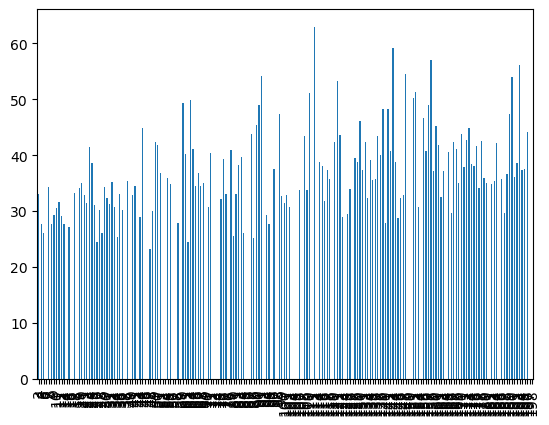

In [21]:
inequality_clean['Gini coefficient'].plot(kind = 'bar')

normalize GINI column

In [22]:
# copy the data
df_min_max_scaled = inequality_clean.copy()

# apply normalization techniques by Column 1
column = 'Gini coefficient'
df_min_max_scaled['Gini coefficient'] = (df_min_max_scaled['Gini coefficient'] - df_min_max_scaled['Gini coefficient'].min()) / (df_min_max_scaled['Gini coefficient'].max() - df_min_max_scaled['Gini coefficient'].min())	

# view normalized data
display(df_min_max_scaled)


,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,-3,6.899906,3.103429,0.953868,2.01457,0.901790,15.58172,0.829672,19.9,11.46,0.248744
4,Norway,0.961,0.908,5.515088,0,5.435152,2.541615,0.948104,2.3324,0.911682,11.43144,0.865839,22.9,8.88,0.113065
5,Iceland,0.959,0.915,4.588113,2,4.556437,1.954472,0.945433,2.20077,0.937802,9.51407,0.864396,23.9,8.78,0.072864
6,"Hong Kong, China (SAR)",0.952,0.828,13.02521,-19,12.429978,2.055595,0.979444,9.671619,0.801655,25.56272,0.724064,..,17.85,NaN
7,Australia,0.951,0.876,7.886435,-6,7.640183,2.73798,0.965535,3.05657,0.895978,17.126,0.776060,19.5,11.28,0.278894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Niger,0.400,0.292,27.0,2,26.7106,28.73307,0.455848,34.96483,0.171570,16.433899,0.317799,19,11.6,0.354271
195,Chad,0.394,0.251,36.294416,1,35.99798,38.558849,0.307446,42.9329,0.176344,26.50219,0.290117,18.2,15.71,0.359296
196,South Sudan,0.385,0.245,36.363636,1,36.259867,36.974091,0.339130,39.55255,0.208441,32.25296,0.208595,12.5,15.53,0.525126
197,Other countries or territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DROP NA's

In [47]:
df_min_max_scaled.dropna()

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
3,Switzerland,0.962,0.894,7.068607,-3,6.899906,3.103429,0.953868,2.01457,0.901790,15.58172,0.829672,19.9,11.46,0.248744
4,Norway,0.961,0.908,5.515088,0,5.435152,2.541615,0.948104,2.3324,0.911682,11.43144,0.865839,22.9,8.88,0.113065
5,Iceland,0.959,0.915,4.588113,2,4.556437,1.954472,0.945433,2.20077,0.937802,9.51407,0.864396,23.9,8.78,0.072864
7,Australia,0.951,0.876,7.886435,-6,7.640183,2.73798,0.965535,3.05657,0.895978,17.126,0.776060,19.5,11.28,0.278894
8,Denmark,0.948,0.898,5.274262,3,5.186914,3.006301,0.915849,2.50376,0.908681,10.05068,0.869997,23.5,12.91,0.113065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Burundi,0.426,0.302,29.107981,3,28.674653,25.606419,0.476837,39.48821,0.243356,20.92933,0.237725,17.9,14.74,0.386935
193,Central African Republic,0.404,0.24,40.594059,-3,40.139813,36.027,0.333592,35.19785,0.238345,49.19459,0.174061,10.3,31,0.829146
194,Niger,0.400,0.292,27.0,2,26.7106,28.73307,0.455848,34.96483,0.171570,16.433899,0.317799,19,11.6,0.354271
195,Chad,0.394,0.251,36.294416,1,35.99798,38.558849,0.307446,42.9329,0.176344,26.50219,0.290117,18.2,15.71,0.359296


Check GINI column

<Axes: >

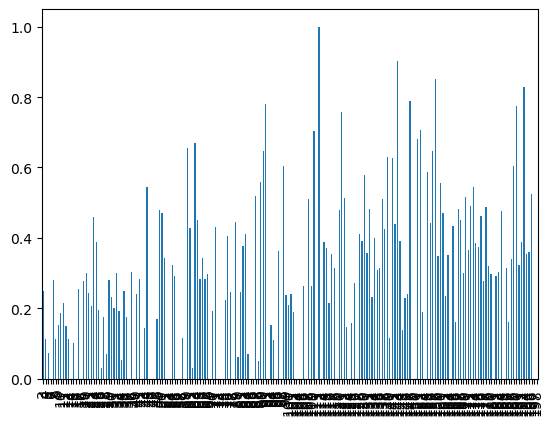

In [24]:
df_min_max_scaled['Gini coefficient'].plot(kind = 'bar')

In [25]:
# copy the data
HDI_min_max_scaled = inequality_clean.copy()

# apply normalization techniques by Column
column = 'Human Development Index (HDI)'
HDI_min_max_scaled['Human Development Index (HDI)'] = (df_min_max_scaled['Human Development Index (HDI)'] - df_min_max_scaled['Human Development Index (HDI)'].min()) / (df_min_max_scaled['Human Development Index (HDI)'].max() - df_min_max_scaled['Human Development Index (HDI)'].min())	

# view normalized data
display(HDI_min_max_scaled)

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
3,Switzerland,1.000000,0.894,7.068607,-3,6.899906,3.103429,0.953868,2.01457,0.901790,15.58172,0.829672,19.9,11.46,33.1
4,Norway,0.998267,0.908,5.515088,0,5.435152,2.541615,0.948104,2.3324,0.911682,11.43144,0.865839,22.9,8.88,27.7
5,Iceland,0.994801,0.915,4.588113,2,4.556437,1.954472,0.945433,2.20077,0.937802,9.51407,0.864396,23.9,8.78,26.1
6,"Hong Kong, China (SAR)",0.982669,0.828,13.02521,-19,12.429978,2.055595,0.979444,9.671619,0.801655,25.56272,0.724064,..,17.85,NaN
7,Australia,0.980936,0.876,7.886435,-6,7.640183,2.73798,0.965535,3.05657,0.895978,17.126,0.776060,19.5,11.28,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Niger,0.025997,0.292,27.0,2,26.7106,28.73307,0.455848,34.96483,0.171570,16.433899,0.317799,19,11.6,37.3
195,Chad,0.015598,0.251,36.294416,1,35.99798,38.558849,0.307446,42.9329,0.176344,26.50219,0.290117,18.2,15.71,37.5
196,South Sudan,0.000000,0.245,36.363636,1,36.259867,36.974091,0.339130,39.55255,0.208441,32.25296,0.208595,12.5,15.53,44.1
197,Other countries or territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
HDI_min_max_scaled['Human Development Index (HDI)'].corr(df_min_max_scaled['Gini coefficient'])

-0.41323390251994413

In [27]:
HDI_sorted = df_min_max_scaled.sort_values('Gini coefficient', ascending=False)
HDI_sorted

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient
112,South Africa,0.713,0.471,33.941094,-22,31.051127,18.863251,0.528525,17.29413,0.626991,56.996,0.315937,7.2,21.93,1.000000
143,Namibia,0.615,0.402,34.634146,-10,32.839455,19.917114,0.483812,25.01567,0.428194,53.58558,0.312574,8.6,21.57,0.902010
158,Zambia,0.565,0.39,30.973451,-4,30.109645,25.052994,0.475319,20.43572,0.432151,44.84022,0.289233,8.9,23.17,0.851759
193,Central African Republic,0.404,0.24,40.594059,-3,40.139813,36.027,0.333592,35.19785,0.238345,49.19459,0.174061,10.3,31,0.829146
148,Eswatini (Kingdom of),0.597,0.424,28.978224,-3,28.601952,23.799307,0.434528,24.10655,0.431318,37.9,0.407212,10.5,19.33,0.788945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Low human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Eritrea,0.492,..,..,..,..,20.265079,0.570851,..,NaN,..,NaN,..,13.82,NaN
185,Afghanistan,0.478,..,..,..,..,26.165367,0.476885,45.36517,0.210131,..,NaN,..,15.25,NaN
197,Other countries or territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


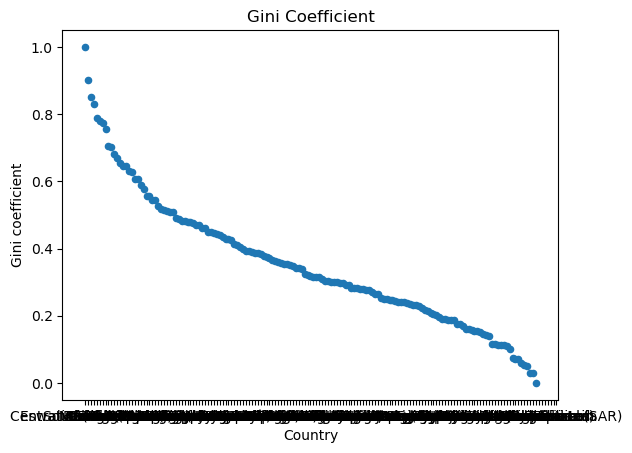

In [28]:

# Scatter plot 
HDI_sorted.plot(x='Country', y='Gini coefficient', kind='scatter',title='Gini Coefficient' )

# Show the plot
plt.show()

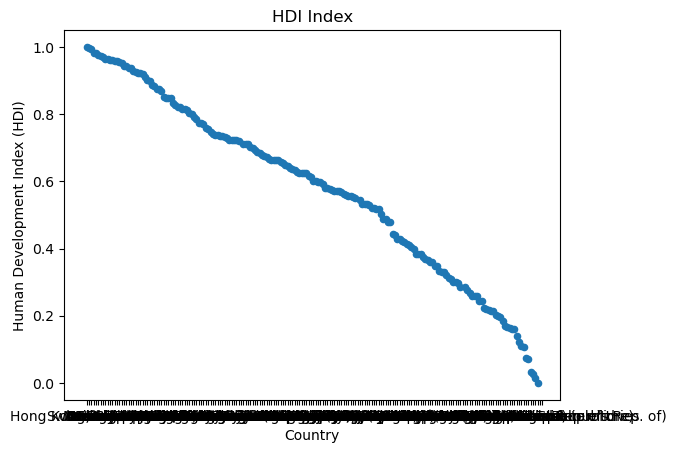

In [29]:
# Scatter plot 
HDI_min_max_scaled.plot(x='Country', y='Human Development Index (HDI)', kind='scatter',title='HDI Index' )

# Show the plot
plt.show()

In [30]:
HDI_min_max_scaled['Human Development Index (HDI)'].corr(HDI_sorted['Gini coefficient'])

-0.41323390251994413

Bring in gdp data for 2020.  Note that this is the closest data we have 
for HDI and GINI, as the data describes 2021, not 2020.

In [31]:
gdp_le_2020 = pd.read_csv('../notebook/gdp_le_2020.csv')

In [32]:
gdp_le_2020

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,0,Afghanistan,2020,1970.560169,Asia,62.575
1,19,Albania,2020,13253.733337,Europe,76.989
2,50,Algeria,2020,10735.382539,Africa,74.453
3,81,Angola,2020,6141.963839,Africa,62.261
4,112,Antigua and Barbuda,2020,17293.302306,North America,78.841
...,...,...,...,...,...,...
171,5090,Vanuatu,2020,2878.475335,Oceania,70.299
172,5121,Vietnam,2020,10338.270543,Asia,75.378
173,5152,West Bank and Gaza,2020,5402.538773,Asia,74.403
174,5179,Zambia,2020,3277.816510,Africa,62.380


In [33]:
master_df = inequality_clean.merge(gdp_le_2020, how='inner', on=['Country'])
master_df


,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Unnamed: 6,Unnamed: 8,Coefficient of human inequality,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares held by (%),Unnamed: 28,Gini coefficient,Unnamed: 0,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Switzerland,0.962,0.894,7.068607,-3,6.899906,3.103429,0.953868,2.01457,0.901790,15.58172,0.829672,19.9,11.46,33.1,4543,2020,68755.437033,Europe,83.000000
1,Norway,0.961,0.908,5.515088,0,5.435152,2.541615,0.948104,2.3324,0.911682,11.43144,0.865839,22.9,8.88,27.7,3489,2020,63548.000816,Europe,83.209756
2,Iceland,0.959,0.915,4.588113,2,4.556437,1.954472,0.945433,2.20077,0.937802,9.51407,0.864396,23.9,8.78,26.1,2032,2020,52375.681125,Europe,83.063415
3,Australia,0.951,0.876,7.886435,-6,7.640183,2.73798,0.965535,3.05657,0.895978,17.126,0.776060,19.5,11.28,34.3,236,2020,48678.682437,Oceania,83.200000
4,Denmark,0.948,0.898,5.274262,3,5.186914,3.006301,0.915849,2.50376,0.908681,10.05068,0.869997,23.5,12.91,27.7,1224,2020,55819.909528,Europe,81.602439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Mali,0.428,0.291,32.009346,-2,31.077906,32.810349,0.402532,43.85965,0.158987,16.56372,0.385661,18.7,9.69,36.1,2864,2020,2225.894238,Africa,58.633000
151,Burundi,0.426,0.302,29.107981,3,28.674653,25.606419,0.476837,39.48821,0.243356,20.92933,0.237725,17.9,14.74,38.6,790,2020,731.064074,Africa,61.566000
152,Central African Republic,0.404,0.24,40.594059,-3,40.139813,36.027,0.333592,35.19785,0.238345,49.19459,0.174061,10.3,31,56.2,950,2020,937.856470,Africa,54.604000
153,Niger,0.400,0.292,27.0,2,26.7106,28.73307,0.455848,34.96483,0.171570,16.433899,0.317799,19,11.6,37.3,3396,2020,1221.269930,Africa,61.451000


In [34]:
master_df['GDP_Per_Capita'].corr(master_df['Gini coefficient'])

-0.3824333124721086

In [35]:
master_df['GDP_Per_Capita'].corr(master_df['Human Development Index (HDI)'])

0.7991170279457388

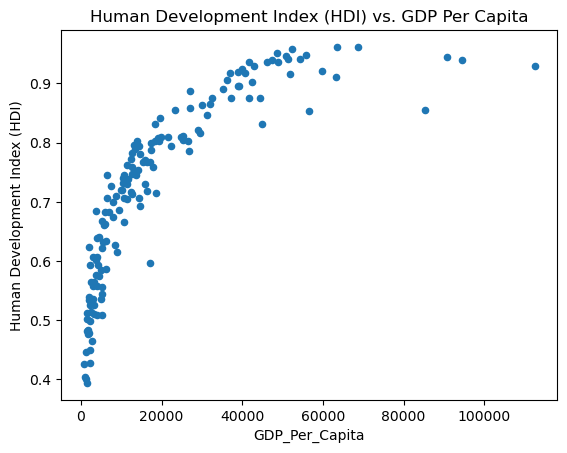

In [36]:
# Scatter plot 
master_df.plot(x='GDP_Per_Capita', y='Human Development Index (HDI)', kind='scatter',title='Human Development Index (HDI) vs. GDP Per Capita')

# Show the plot
plt.show();

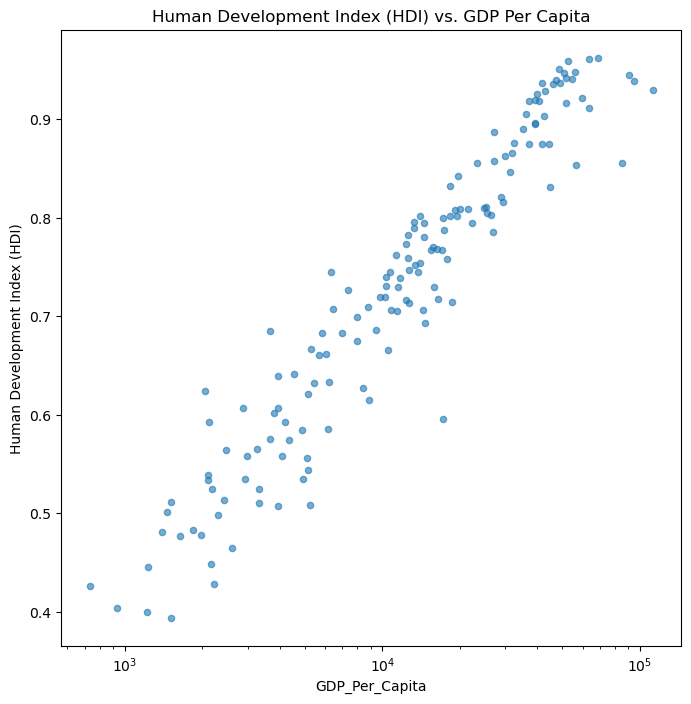

In [48]:
import matplotlib.cm as cm
# Scatter plot 
master_df.plot(figsize=(8, 8), 
 x='GDP_Per_Capita', y='Human Development Index (HDI)', 
               kind='scatter', 
               title='Human Development Index (HDI) vs. GDP Per Capita', 
               alpha=.6)
plt.xscale('log')

plt.show();



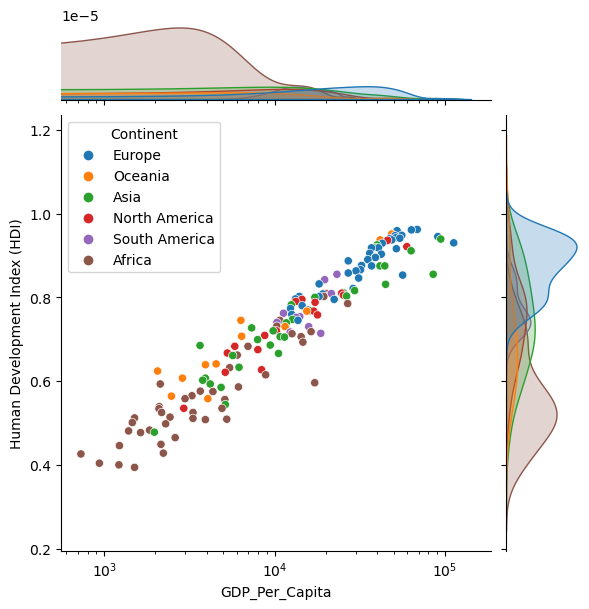

In [59]:


sns.jointplot(data=master_df, x='GDP_Per_Capita', y='Human Development Index (HDI)', hue="Continent")
plt.xscale('log')
figsize=(18, 18);

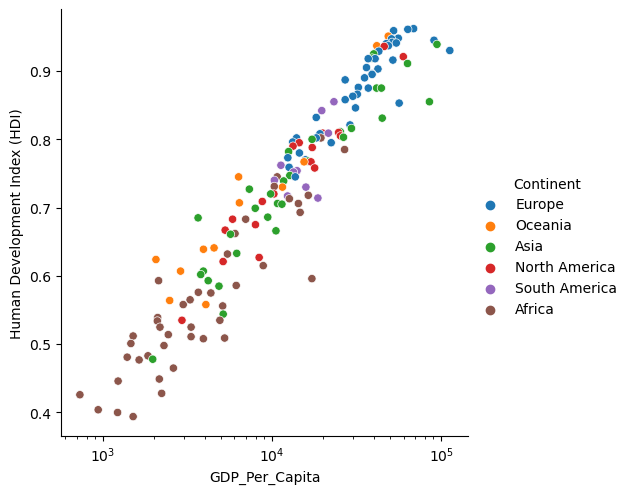

In [44]:
sns.relplot(
   data=master_df, 
    x='GDP_Per_Capita', 
    y='Human Development Index (HDI)', 
    hue="Continent")
figsize=(14, 14)
plt.xscale('log')

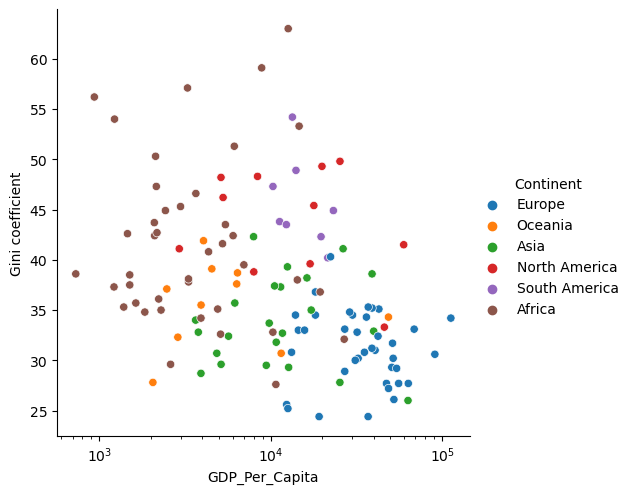

In [57]:
sns.relplot(
   data=master_df, 
    x='GDP_Per_Capita', 
    y='Gini coefficient', 
    hue="Continent")
figsize=(14, 14)
plt.xscale('log')